In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import warnings
import os
import scipy
import random

In [64]:
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier

In [66]:
df = pd.read_csv("C:/Users/divya/Downloads/loan_data_set.csv")
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             180.0   
1             4583             1508.0       128.0             180.0   
2             3000                0.0        66.0             180.0   
3             2583             2358.0       120.0             180.0   
4             6000                0.0       141.0             180.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [67]:
df.Loan_ID.value_counts(dropna=False)
df.Gender.value_counts(dropna=False)
df['Gender'].fillna('preferred not to say', inplace=True)
a=df[df['Gender']=='preferred not to say']
print(a)

      Loan_ID                Gender Married Dependents     Education  \
23   LP001050  preferred not to say     Yes          2  Not Graduate   
126  LP001448  preferred not to say     Yes         3+      Graduate   
171  LP001585  preferred not to say     Yes         3+      Graduate   
188  LP001644  preferred not to say     Yes          0      Graduate   
314  LP002024  preferred not to say     Yes          0      Graduate   
334  LP002103  preferred not to say     Yes          1      Graduate   
460  LP002478  preferred not to say     Yes          0      Graduate   
467  LP002501  preferred not to say     Yes          0      Graduate   
477  LP002530  preferred not to say     Yes          2      Graduate   
507  LP002625  preferred not to say      No          0      Graduate   
576  LP002872  preferred not to say     Yes          0      Graduate   
588  LP002925  preferred not to say      No          0      Graduate   
592  LP002933  preferred not to say      No         3+      Grad

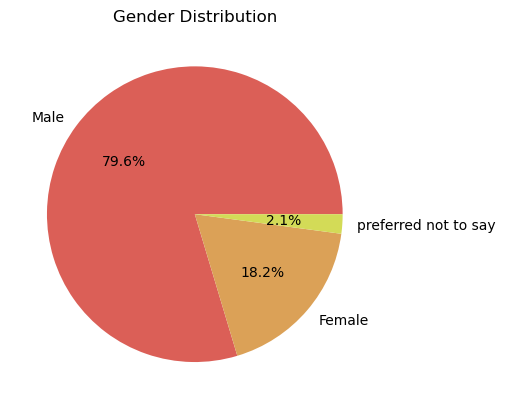

Gender Division
Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Percentage of Preferred not to say: 2.12%
Missing values percentage: 0.00%


In [68]:
Gender_count=df['Gender'].value_counts()
color=sns.color_palette("hls",len('Gender_count'))
plt.pie(Gender_count, labels=Gender_count.index,autopct='%1.1f%%',colors=color)
plt.title('Gender Distribution')
plt.show()
countMale = len(df[df.Gender == 'Male'])
countFemale = len(df[df.Gender == 'Female'])
countPNTS = len(df[df.Gender == 'preferred not to say'])
countNull = len(df[df.Gender.isnull()])
print("Gender Division")
print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(df.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Percentage of Preferred not to say: {:.2f}%".format((countPNTS / (len(df.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Gender))*100)))

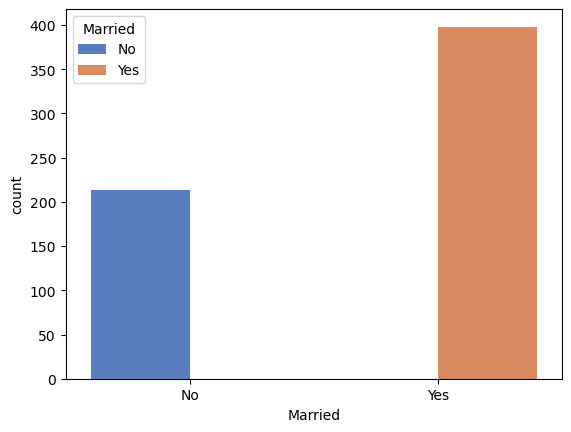

Percentage of married: 65.14%
Percentage of Not married applicant: 34.86%
Missing values percentage: 0.49%


In [69]:
df.Married.value_counts(dropna=False)
sns.countplot(x="Married", data=df, hue="Married", palette="muted")
plt.show()
countMarried = len(df[df.Married == 'Yes'])
countNotMarried = len(df[df.Married == 'No'])
countNull = len(df[df.Married.isnull()])
df.dropna(subset=['Married'],inplace=True)
print("Percentage of married: {:.2f}%".format((countMarried / (len(df.Married))*100)))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(df.Married))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Married))*100)))

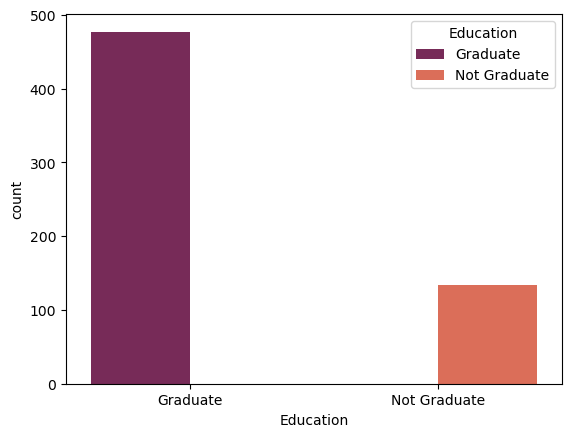

Percentage of graduate applicant: 78.07%
Percentage of Not graduate applicant: 21.93%
Missing values percentage: 0.00%


In [70]:
sns.countplot(x="Education", data=df, hue="Education", palette="rocket")
plt.show()
countGraduate = len(df[df.Education == 'Graduate'])
countNotGraduate = len(df[df.Education == 'Not Graduate'])
countNull = len(df[df.Education.isnull()])
df.dropna(subset=['Married'],inplace=True)
print("Percentage of graduate applicant: {:.2f}%".format((countGraduate / (len(df.Education))*100)))
print("Percentage of Not graduate applicant: {:.2f}%".format((countNotGraduate / (len(df.Education))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Education))*100)))

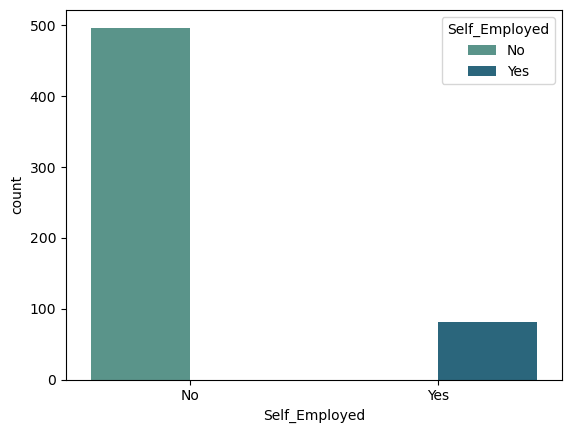

0                   Student
1                   Student
2      Working Professional
3                   Student
4                   Student
               ...         
609                 Student
610                 Student
611                 Student
612                 Student
613    Working Professional
Name: Self_Employed, Length: 611, dtype: object
Percentage of Student: 85.84%
Percentage of Working professional: 14.16%
Missing values percentage: 5.53%


In [71]:
sns.countplot(x="Self_Employed", data=df, hue="Self_Employed", palette="crest")
plt.show()
df['Self_Employed']=df['Self_Employed'].replace('No','Student')
df['Self_Employed']=df['Self_Employed'].replace('Yes','Working Professional')
countNo = len(df[df.Self_Employed == 'Student'])
countYes = len(df[df.Self_Employed == 'Working Professional'])
countNull = len(df[df.Self_Employed.isnull()])
print(df['Self_Employed'])
df.dropna(subset=['Self_Employed'],inplace=True)
print("Percentage of Student: {:.2f}%".format((countNo / (len(df.Self_Employed))*100)))
print("Percentage of Working professional: {:.2f}%".format((countYes / (len(df.Self_Employed))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Self_Employed))*100)))


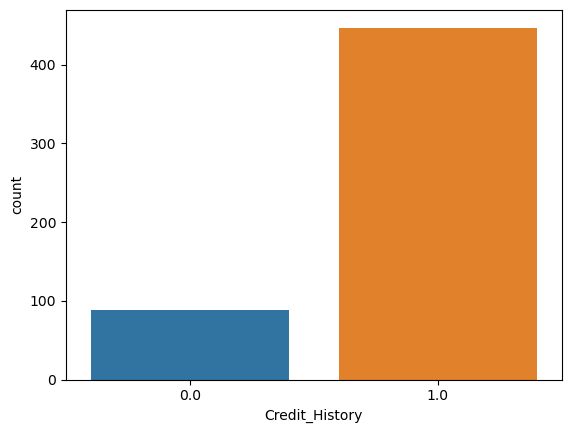

Percentage of Good credit history: 83.55%
Percentage of Bad credit history: 16.45%
Missing values percentage: 8.22%


In [72]:
sns.countplot(x="Credit_History",data=df)
plt.show()
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])
df.dropna(subset=['Credit_History'],inplace=True)
print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))


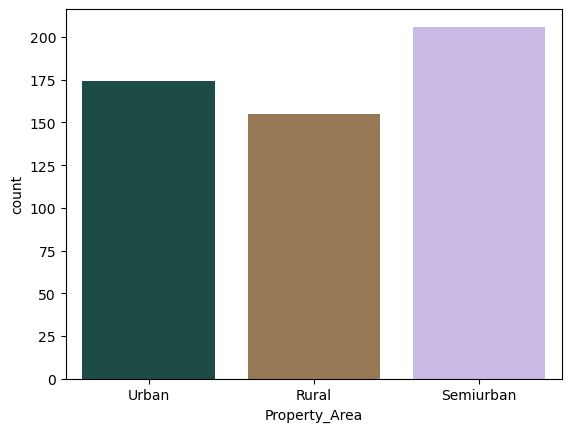

Percentage of Urban: 32.52%
Percentage of Rural: 28.97%
Percentage of Semiurban: 38.50%
Missing values percentage: 0.00%


In [73]:
sns.countplot(x="Property_Area",data=df,palette="cubehelix")
plt.show()
countUrban = len(df[df.Property_Area == 'Urban'])
countRural = len(df[df.Property_Area == 'Rural'])
countSemiurban = len(df[df.Property_Area == 'Semiurban'])
countNull = len(df[df.Property_Area.isnull()])
df.dropna(subset=['Property_Area'],inplace=True)
print("Percentage of Urban: {:.2f}%".format((countUrban / (len(df.Property_Area))*100)))
print("Percentage of Rural: {:.2f}%".format((countRural / (len(df.Property_Area))*100)))
print("Percentage of Semiurban: {:.2f}%".format((countSemiurban / (len(df.Property_Area))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Property_Area))*100)))

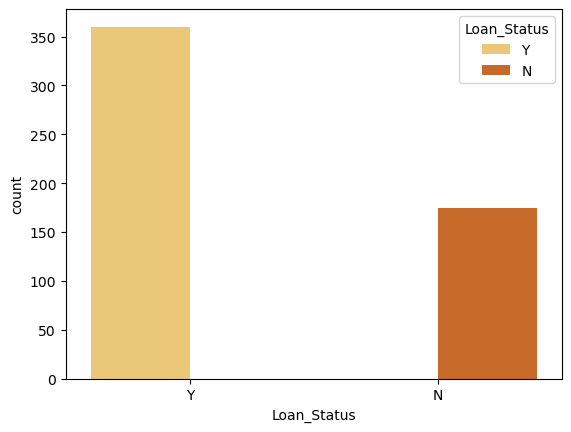

Percentage of Approved: 67.29%
Percentage of Rejected: 32.71%
Missing values percentage: 0.00%


In [74]:
sns.countplot(x="Loan_Status", data=df, hue="Loan_Status", palette="YlOrBr")
plt.show()
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])
print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

In [75]:
count12 = len(df[df.Loan_Amount_Term == 12.0])
count36 = len(df[df.Loan_Amount_Term == 36.0])
count60 = len(df[df.Loan_Amount_Term == 60.0])
count84 = len(df[df.Loan_Amount_Term == 84.0])
count120 = len(df[df.Loan_Amount_Term == 120.0])
count144 = len(df[df.Loan_Amount_Term == 144.0])
count156 = len(df[df.Loan_Amount_Term == 156.0])
count180 = len(df[df.Loan_Amount_Term == 180.0])
count192 = len(df[df.Loan_Amount_Term == 192.0])
countNull = len(df[df.Loan_Amount_Term.isnull()])
# Calculate percentages for each loan term
percentages = {
    12: (count12 / len(df.Loan_Amount_Term)) * 100,
    36: (count36 / len(df.Loan_Amount_Term)) * 100,
    60: (count60 / len(df.Loan_Amount_Term)) * 100,
    84: (count84 / len(df.Loan_Amount_Term)) * 100,
    120: (count120 / len(df.Loan_Amount_Term)) * 100,
    144: (count180 / len(df.Loan_Amount_Term)) * 100,
    156: (count156 / len(df.Loan_Amount_Term)) * 100,
    180: (count180 / len(df.Loan_Amount_Term)) * 100,
    192: (count192 / len(df.Loan_Amount_Term)) * 100
}

# Print the percentages
for term, percentage in percentages.items():
    print(f"Percentage of {term}: {percentage:.2f}%")
df.dropna(subset=['Loan_Amount_Term'],inplace=True)
# Missing values percentage
missing_percentage = (countNull / len(df.Loan_Amount_Term)) * 10
print(f"Missing values percentage: {missing_percentage:.2f}%")

# Determine the loan term with the highest percentage
most_successful_term = max(percentages, key=percentages.get)
print(f"Most successful loan tenure is {most_successful_term} month with a percentage of {percentages[most_successful_term]:.2f}%")


Percentage of 12: 0.00%
Percentage of 36: 0.37%
Percentage of 60: 0.37%
Percentage of 84: 0.56%
Percentage of 120: 0.56%
Percentage of 144: 91.03%
Percentage of 156: 0.37%
Percentage of 180: 91.03%
Percentage of 192: 2.43%
Missing values percentage: 0.25%
Most successful loan tenure is 144 month with a percentage of 91.03%


    Loan_ID Gender Married Dependents     Education         Self_Employed  \
0  LP001002   Male      No          0      Graduate               Student   
1  LP001003   Male     Yes          1      Graduate               Student   
2  LP001005   Male     Yes          0      Graduate  Working Professional   
3  LP001006   Male     Yes          0  Not Graduate               Student   
4  LP001008   Male      No          0      Graduate               Student   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             180.0   
1             4583             1508.0       128.0             180.0   
2             3000                0.0        66.0             180.0   
3             2583             2358.0       120.0             180.0   
4             6000                0.0       141.0             180.0   

   Credit_History Property_Area Loan_Status  \
0             1.0         Urban           Y   
1             1.

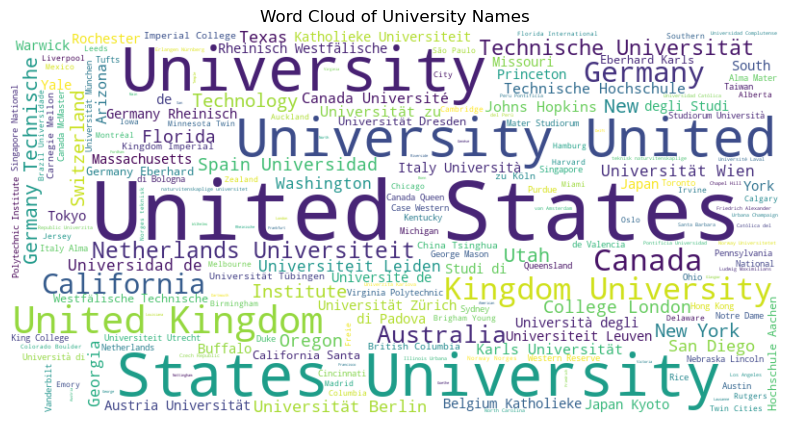

In [76]:
name_university = [
    "United States Massachusetts Institute of Technology",
    "United States Harvard University",
    "United States Stanford University",
    "United States Cornell University",
    "United States University of California, Berkeley",
    "United States University of Michigan",
    "United States University of Washington",
    "United States Columbia University in the City of New York",
    "United Kingdom University of Oxford",
    "United States University of California, Los Angeles",
    "United States Yale University",
    "United States University of Pennsylvania",
    "Mexico Universidad Nacional Autónoma de México",
    "United States University of Wisconsin-Madison",
    "United States The University of Texas at Austin",
    "United Kingdom University of Cambridge",
    "United States University of Chicago",
    "United States Princeton University",
    "United States University of Minnesota Twin Cities",
    "United States Purdue University",
    "United States University of California, Davis",
    "Canada University of Toronto",
    "United States University of California, San Diego",
    "United States Johns Hopkins University",
    "United States New York University",
    "United States Penn State University",
    "United States University of Florida",
    "United States Michigan State University",
    "United States University of Southern California",
    "United States University of North Carolina at Chapel Hill",
    "United States Carnegie Mellon University",
    "Canada The University of British Columbia",
    "United States Arizona State University",
    "United States Duke University",
    "United States University of Maryland",
    "United States Rutgers, The State University of New Jersey",
    "United States University of Illinois Urbana-Champaign",
    "United States The Ohio State University",
    "United States University of Colorado Boulder",
    "United States Texas A&M University",
    "United States The University of Arizona",
    "United States University of California, Irvine",
    "United States Northwestern University",
    "United States University of Virginia",
    "United Kingdom University College London",
    "United States Boston University",
    "United States North Carolina State University",
    "United States The University of Utah",
    "United States Indiana University Bloomington",
    "Australia University of New South Wales",
    "Switzerland Eidgenössische Technische Hochschule Zürich",
    "Brazil Universidade de São Paulo",
    "United States University of California, Santa Barbara",
    "Canada McGill University",
    "United States Georgetown University",
    "United States University of Pittsburgh",
    "United Kingdom University of Edinburgh",
    "United States Washington University in St. Louis",
    "United States Tufts University",
    "United States University of Nebraska-Lincoln",
    "United States Virginia Polytechnic Institute and State University",
    "Australia The University of Sydney",
    "United States Oregon State University",
    "United States Brigham Young University",
    "Australia Monash University",
    "Canada University of Waterloo",
    "United States Georgia Institute of Technology",
    "United States University of Georgia",
    "United States University of Rochester",
    "United States Brown University",
    "Australia The University of Melbourne",
    "United States California Institute of Technology",
    "United States University of Iowa",
    "United States Iowa State University",
    "United States Colorado State University",
    "United States University of California, San Francisco",
    "Canada Simon Fraser University",
    "United States George Washington University",
    "United States University of Massachusetts Amherst",
    "United Kingdom The London School of Economics and Political Science",
    "Belgium Katholieke Universiteit Leuven",
    "United States George Mason University",
    "United States University of South Florida",
    "United States Washington State University",
    "Germany Ludwig-Maximilians-Universität München",
    "United States Florida State University",
    "United States Vanderbilt University",
    "Canada University of Alberta",
    "United States Syracuse University",
    "Australia The University of Queensland",
    "Austria Universität Wien",
    "Japan The University of Tokyo",
    "United States University of Oregon",
    "United States Emory University",
    "United States University of California, Santa Cruz",
    "United States University of Notre Dame",
    "Australia Australian National University",
    "United States Dartmouth College",
    "United States University of Connecticut",
    "United States University of Houston",
    "United States University at Buffalo, State University of New York",
    "United States University of Kentucky",
    "United Kingdom University of Manchester",
    "United States University of Illinois Chicago",
    "United States University of California, Riverside",
    "United Kingdom University of Southampton",
    "Netherlands Universiteit Utrecht",
    "United Kingdom Imperial College London",
    "United States Rice University",
    "United Kingdom University of Glasgow",
    "Italy Alma Mater Studiorum Università di Bologna",
    "Canada York University",
    "United States University of Central Florida",
    "Netherlands Universiteit van Amsterdam",
    "United States University of Missouri",
    "United States Georgia State University",
    "Netherlands Technische Universiteit Delft",
    "United States Northeastern University",
    "Canada University of Calgary",
    "United States University of Kansas",
    "Germany Technische Universität München",
    "United States University of Delaware",
    "Germany Ruprecht-Karls-Universität Heidelberg",
    "Germany Freie Universität Berlin",
    "United Kingdom University of Warwick",
    "United Kingdom University of Birmingham",
    "Netherlands Universiteit Leiden",
    "Norway Universitetet i Oslo",
    "Spain Universidad de Barcelona",
    "Argentina Universidad de Buenos Aires",
    "Netherlands Rijksuniversiteit Groningen",
    "Finland Helsingin yliopisto",
    "Germany Friedrich-Alexander-Universität Erlangen-Nürnberg",
    "Canada McMaster University",
    "United Kingdom King's College London",
    "Spain Universidad Complutense de Madrid",
    "United States The University of Tennessee, Knoxville",
    "United States University of New Mexico",
    "Japan Kyoto University",
    "Germany Technische Universität Berlin",
    "United States University of Miami",
    "Switzerland École Polytechnique Fédérale de Lausanne",
    "United States University of North Texas",
    "Denmark Københavns Universitet",
    "United Kingdom University of Leeds",
    "Canada Western University",
    "Belgium Universiteit Gent",
    "Singapore National University of Singapore",
    "Canada Université de Montréal",
    "United States University of South Carolina",
    "Canada University of Victoria",
    "United States Boston College",
    "United States Louisiana State University",
    "Germany Universität Hamburg",
    "United States Florida International University",
    "Germany Humboldt-Universität zu Berlin",
    "Germany Ruhr-Universität Bochum",
    "United States San Diego State University",
    "United States Temple University",
    "United States Drexel University",
    "Switzerland Universität Zürich",
    "Germany Rheinisch-Westfälische Technische Hochschule Aachen",
    "Austria Technische Universität Wien",
    "United States University of Cincinnati",
    "Taiwan National Taiwan University",
    "United States Clemson University",
    "Italy Università degli Studi di Padova",
    "Hong Kong The University of Hong Kong",
    "Spain Universidad de Granada",
    "United Kingdom Newcastle University",
    "Czech Republic Masarykova univerzita",
    "United Kingdom The University of York",
    "United States University of New Hampshire",
    "Czech Republic Univerzita Karlova",
    "Norway Norges teknisk-naturvitenskaplige universitet",
    "New Zealand University of Auckland",
    "Switzerland Université de Genève",
    "United States Rochester Institute of Technology",
    "United States University of Vermont",
    "United States Utah State University",
    "Germany Eberhard Karls Universität Tübingen",
    "Canada Université Laval",
    "Saudi Arabia King Saud University",
    "China Tsinghua University",
    "United Kingdom University of Nottingham",
    "Peru Pontificia Universidad Católica del Perú",
    "Canada Queen's University",
    "Germany Universität zu Köln",
    "Spain Universidad de Valencia",
    "United States American University",
    "United Kingdom University of Liverpool",
    "Germany Rheinische Friedrich-Wilhelms-Universität Bonn",
    "United States Case Western Reserve University",
    "Denmark Aarhus Universitet",
    "United States Fordham University",
    "United States Virginia Commonwealth University",
    "Australia The University of Adelaide",
    "Germany Technische Universität Dresden",
    "Russia Moscow State University",
    "Germany Goethe-Universität Frankfurt am Main"
]
# Adding a column of random universities
df['Name_University'] = [random.choice(name_university) for _ in range(len(df))]
print(df.head())
text= " ".join(df["Name_University"])
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of University Names")
plt.show()

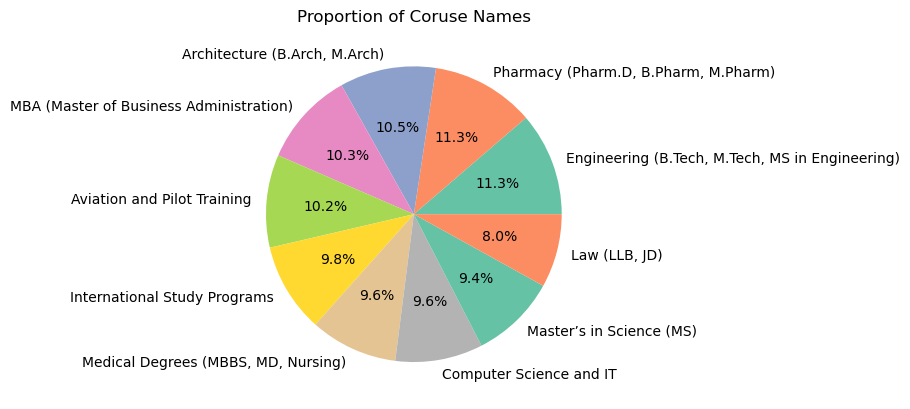

In [77]:

courses = [
  "MBA (Master of Business Administration)",
  "Medical Degrees (MBBS, MD, Nursing)",
  "Engineering (B.Tech, M.Tech, MS in Engineering)",
  "Law (LLB, JD)",
  "Computer Science and IT",
  "Master’s in Science (MS)",
  "Aviation and Pilot Training",
  "Architecture (B.Arch, M.Arch)",
  "International Study Programs",
  "Pharmacy (Pharm.D, B.Pharm, M.Pharm)"
]

df['applied_course'] = [random.choice(courses) for _ in range(len(df))]
course_count=df['applied_course'].value_counts()
plt.pie(course_count,labels=course_count.index, autopct='%1.1f%%',colors=sns.color_palette("Set2",len(course_count)))
plt.title("Proportion of Coruse Names")
plt.show()

In [78]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,522.000000,522.000000,502.000000
mean,5445.500000,1540.681839,145.500000
std,5968.047043,2539.499185,83.031023
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3858.500000,1084.500000,128.000000
75%,5827.000000,2206.750000,169.500000
max,81000.000000,33837.000000,700.000000


C:\Users\divya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\divya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\divya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


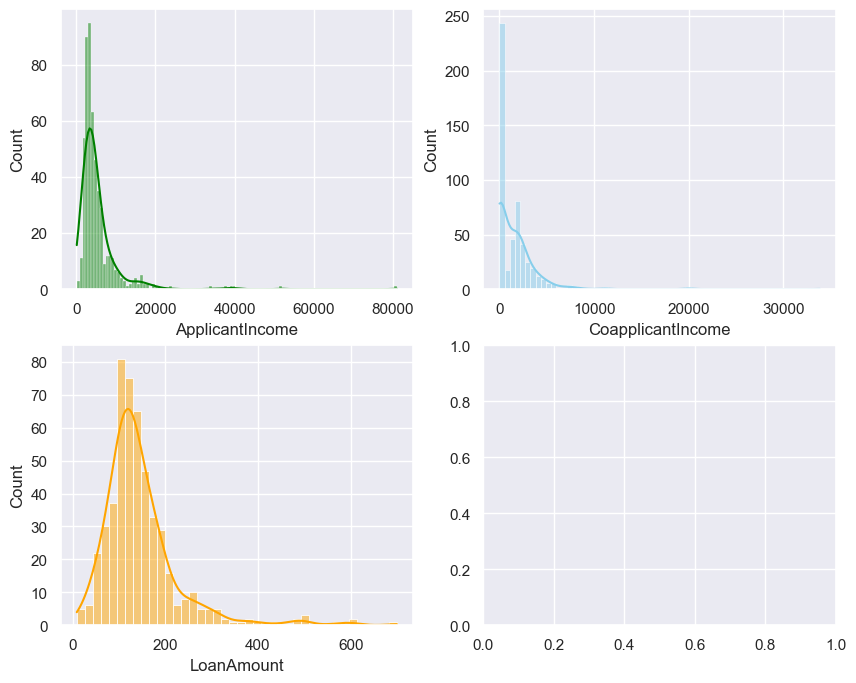

In [79]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

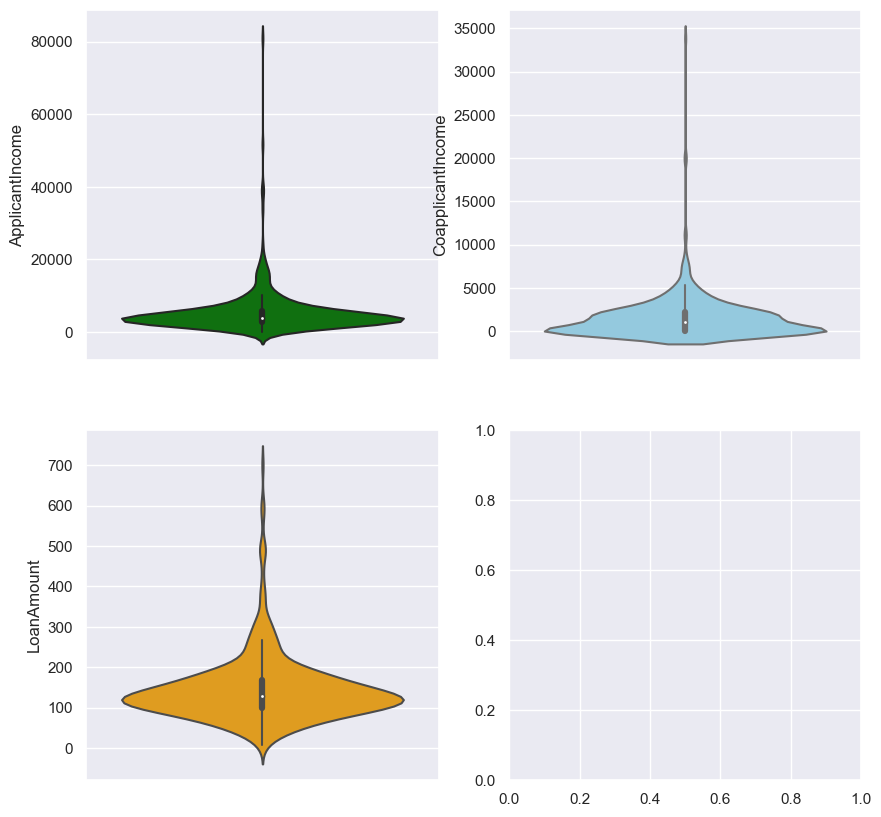

In [80]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))

sns.violinplot(data=df, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.violinplot(data=df, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.violinplot(data=df, y="LoanAmount", ax=axs1[1, 0], color='orange');

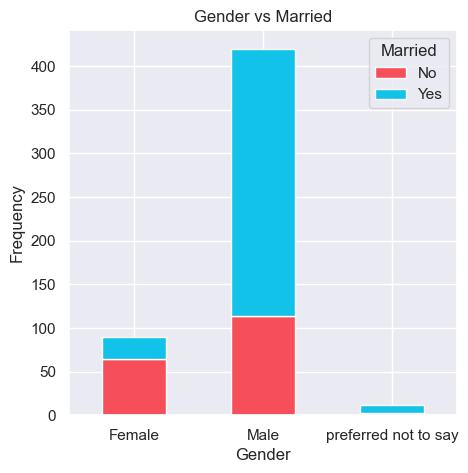

In [81]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

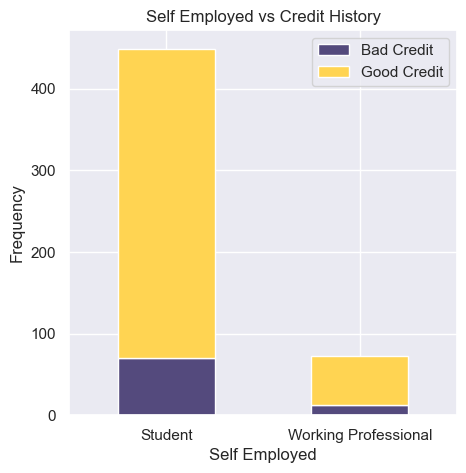

In [82]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

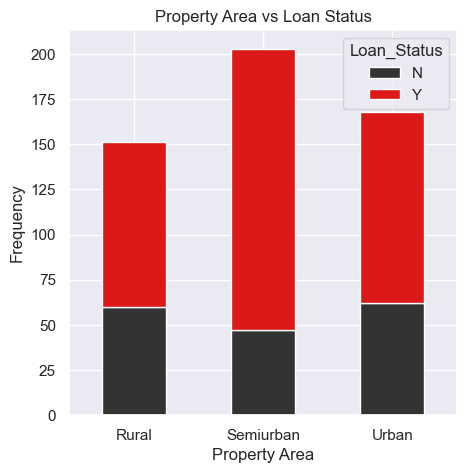

In [83]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

C:\Users\divya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\divya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\divya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


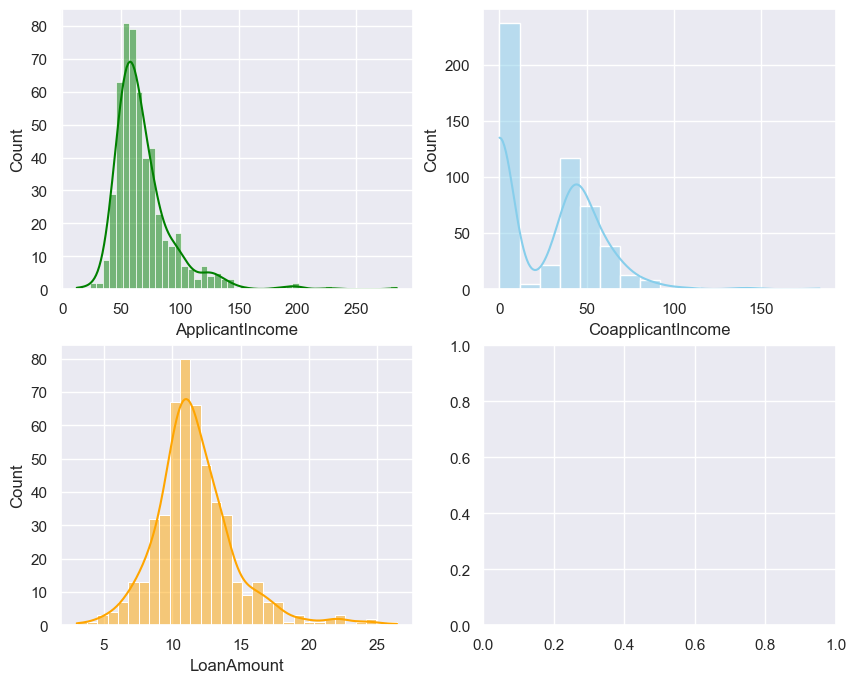

In [84]:
# Square Root Transformation

df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

In [85]:
    # Prepare the data by handling missing values
    X = df.drop(["Loan_Status", "Loan_ID"], axis=1)
    y = df["Loan_Status"]
    
    # Separate numeric and categorical columns
    numeric_cols = X.select_dtypes(include=['number']).columns
    categorical_cols = X.select_dtypes(include=['object']).columns
    
    # Fill missing values in numeric columns with the mean
    X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())
    
    # Fill missing values in categorical columns with the mode (most frequent value)
    for col in categorical_cols:
        X[col] = X[col].fillna(X[col].mode()[0])
    
    # Ensure all categorical columns in X are treated as strings
    for col in categorical_cols:
        X[col] = X[col].astype(str)
    
    # Convert Loan_Status (target) column to a string
    y = y.astype(str)
    
    # One-Hot Encoding for Categorical Features
    X = pd.get_dummies(X, drop_first=True)
    
    #  Check if X and y have the same number of samples
    print("Before SMOTE: X shape:", X.shape, "y shape:", y.shape)
    
    #  Balance the dataset using SMOTE
    smote = SMOTE(random_state=0)
    import time
    # Start the timer
    start_time = time.time()
    
    # Resample the data
    X, y = smote.fit_resample(X, y)
    
    #  Scale the features using MinMaxScaler
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    
    #  Split the dataset into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    #  Train a Logistic Regression model
    lr_model = LogisticRegression(solver='liblinear', max_iter=500, random_state=0)
    lr_model.fit(X_train, y_train)
    
    #  Make predictions on the test set
    y_pred = lr_model.predict(X_test)
    
    # Stop the timer
    end_time = time.time()
    
    # Calculate the time taken to run the model
    time_taken = end_time - start_time
    print(f"Time taken to run the model: {time_taken:.2f} seconds")
    
    # Evaluate the model
    # Print classification report and confusion matrix
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    #  Print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print('Logistic Regression Accuracy: {:.2f}%'.format(accuracy * 100))
import joblib

# Train the Logistic Regression model
log_model = lr_model
log_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(log_model, 'logistic_model.pkl')
print("Logistic Regression model saved!")


Before SMOTE: X shape: (522, 210) y shape: (522,)
Time taken to run the model: 0.44 seconds
Classification Report:
              precision    recall  f1-score   support

           N       0.89      0.79      0.83        70
           Y       0.81      0.90      0.86        72

    accuracy                           0.85       142
   macro avg       0.85      0.84      0.84       142
weighted avg       0.85      0.85      0.84       142

Confusion Matrix:
[[55 15]
 [ 7 65]]
Logistic Regression Accuracy: 84.51%
Logistic Regression model saved!


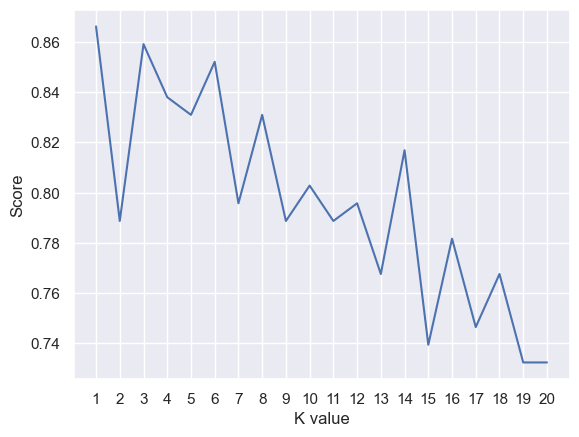

KNN best accuracy: 86.62%
Total runtime: 2.5781 seconds


In [86]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def measure_runtime_and_accuracy():
    scoreListknn = []
    start_time = time.time()  # Start timer

    for i in range(1, 21):
        KNclassifier = KNeighborsClassifier(n_neighbors=i)
        KNclassifier.fit(X_train, y_train)
        scoreListknn.append(KNclassifier.score(X_test, y_test))

    end_time = time.time()  # End timer
    total_time = end_time - start_time

    # Plotting
    plt.plot(range(1, 21), scoreListknn)
    plt.xticks(np.arange(1, 21, 1))
    plt.xlabel("K value")
    plt.ylabel("Score")
    plt.show()

    # Best accuracy
    KNAcc = max(scoreListknn)
    print("KNN best accuracy: {:.2f}%".format(KNAcc * 100))
    print(f"Total runtime: {total_time:.4f} seconds")

# Call the function
measure_runtime_and_accuracy()


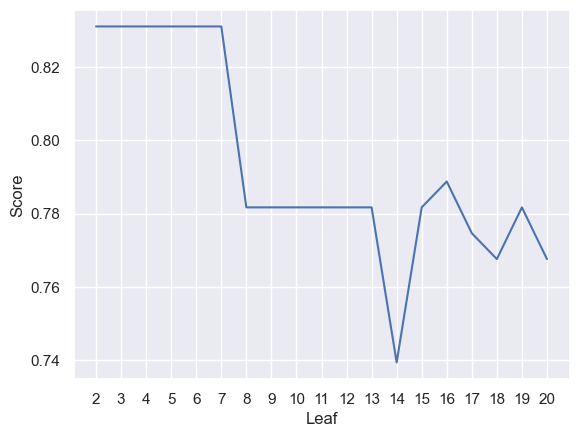

Decision Tree Accuracy: 83.10%
Total runtime: 0.1718 seconds


In [88]:
import time
import numpy as np
def measure_runtime_and_accuracy_dt():
    scoreListDT = []
    start_time = time.time()  # Start timer

    for i in range(2, 21):
        DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
        DTclassifier.fit(X_train, y_train)
        scoreListDT.append(DTclassifier.score(X_test, y_test))

    end_time = time.time()  # End timer
    total_time = end_time - start_time

    # Plotting
    plt.plot(range(2, 21), scoreListDT)
    plt.xticks(np.arange(2, 21, 1))
    plt.xlabel("Leaf")
    plt.ylabel("Score")
    plt.show()

    # Best accuracy
    DTAcc = max(scoreListDT)
    print("Decision Tree Accuracy: {:.2f}%".format(DTAcc * 100))
    print(f"Total runtime: {total_time:.4f} seconds")

# Call the function
measure_runtime_and_accuracy_dt()


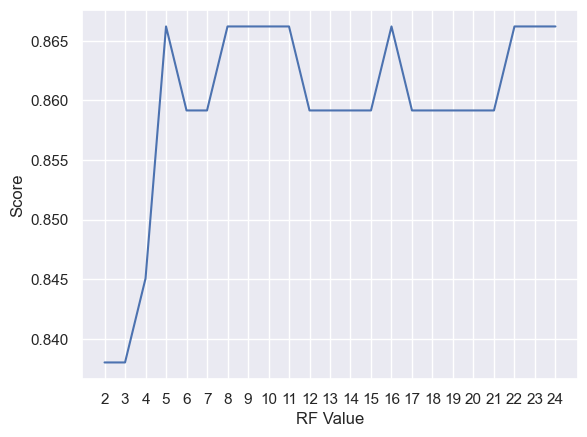

Random Forest Accuracy: 86.62%
Total runtime: 39.6279 seconds


In [89]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

def measure_runtime_and_accuracy_rf():
    scoreListRF = []
    start_time = time.time()  # Start timer

    for i in range(2, 25):
        RFclassifier = RandomForestClassifier(
            n_estimators=1000, random_state=1, max_leaf_nodes=i
        )
        RFclassifier.fit(X_train, y_train)
        scoreListRF.append(RFclassifier.score(X_test, y_test))

    end_time = time.time()  # End timer
    total_time = end_time - start_time

    # Plotting
    plt.plot(range(2, 25), scoreListRF)
    plt.xticks(np.arange(2, 25, 1))
    plt.xlabel("RF Value")
    plt.ylabel("Score")
    plt.show()

    # Best accuracy
    RFAcc = max(scoreListRF)
    print("Random Forest Accuracy: {:.2f}%".format(RFAcc * 100))
    print(f"Total runtime: {total_time:.4f} seconds")

# Call the function
measure_runtime_and_accuracy_rf()


In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
#from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Define the models and their respective parameter grids
models_and_params = {
    "DecisionTreeClassifier": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "criterion": ["gini", "entropy"],
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10]
        }
    },
    "DecisionTreeRegressor": {
        "model": DecisionTreeRegressor(random_state=42),
        "params": {
            "criterion": ["squared_error", "friedman_mse"],
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10]
        }
    },
    "KNeighborsClassifier": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7, 10],
            "weights": ["uniform", "distance"],
            "metric": ["euclidean", "manhattan"]
        }
    },
    "LinearRegression": {
        "model": LinearRegression(),
        "params": {
            "fit_intercept": [True, False]
        }
    },
    "LogisticRegression": {
        "model": LogisticRegression(random_state=42, max_iter=500),
        "params":{
            "C": [0.1, 1, 10],
            "solver": ["lbfgs", "liblinear"]
        }
    },
    "RandomForestClassifier": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10]
        }
    },
  #  "XGBClassifier": {
      #  "model": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
       # "params": {
        #    "n_estimators": [50, 100, 200],
         #   "learning_rate": [0.01, 0.1, 0.2],
          #  "max_depth": [3, 5, 7]
        }


# Example dataset (replace X_train, y_train with your actual data)
X = df.drop(["Loan_Status", "Loan_ID"], axis=1)
y = df["Loan_Status"]
    
    # Separate numeric and categorical columns
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns
    
    # Fill missing values in numeric columns with the mean
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())
    
    # Fill missing values in categorical columns with the mode (most frequent value)
for col in categorical_cols:
    X[col] = X[col].fillna(X[col].mode()[0])
    
    # Ensure all categorical columns in X are treated as strings
for col in categorical_cols:
    X[col] = X[col].astype(str)
    
    # Convert Loan_Status (target) column to a string
y = y.astype(str)
    
    # One-Hot Encoding for Categorical Features
X = pd.get_dummies(X, drop_first=True)
    
    #  Check if X and y have the same number of samples
   
    #  Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
        
# Perform GridSearchCV for each model
best_models = {}
results = []  # Store results for all models

for model_name, config in models_and_params.items():
    print(f"Running GridSearchCV for {model_name}...")
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(
        estimator=config["model"], 
        param_grid=config["params"], 
        scoring='accuracy' if 'Classifier' in model_name else 'neg_mean_squared_error', 
        cv=5, 
        n_jobs=-1
    )
    
    # Fit GridSearchCV
    try:
        grid_search.fit(X_train, y_train)
    except ValueError as e:
        print(f"Error fitting {model_name}: {e}")
        continue  # Skip this model if there's an error

    # Store the best model and parameters
    best_models[model_name] = {
        "best_estimator": grid_search.best_estimator_,
        "best_params": grid_search.best_params_,
        "best_score": grid_search.best_score_
    }
    
    # Evaluate on test set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    if 'Classifier' in model_name:
        test_metric = accuracy_score(y_test, y_pred)
        test_metric_name = "Accuracy"
    else:
        test_metric = mean_squared_error(y_test, y_pred)
        test_metric_name = "MSE"
    
    # Append the results
    results.append({
        "Model": model_name,
        "Best Score (CV)": grid_search.best_score_,
        "Test Metric": test_metric_name,
        "Test Score": test_metric,
        "Best Parameters": grid_search.best_params_
    })

# Create a DataFrame to display results
results_df = pd.DataFrame(results)
print(results_df)

# Optional: Save results to CSV
results_df.to_csv("model_comparison_results.csv", index=False)


Running GridSearchCV for DecisionTreeClassifier...
Running GridSearchCV for DecisionTreeRegressor...
Running GridSearchCV for KNeighborsClassifier...
Running GridSearchCV for LinearRegression...
Running GridSearchCV for LogisticRegression...
Running GridSearchCV for RandomForestClassifier...
                    Model  Best Score (CV) Test Metric  Test Score  \
0  DecisionTreeClassifier     7.507458e-01    Accuracy    0.723810   
1   DecisionTreeRegressor    -2.062195e-01         MSE    0.196650   
2    KNeighborsClassifier     6.690476e-01    Accuracy    0.628571   
3        LinearRegression    -5.392919e+13         MSE    0.257204   
4      LogisticRegression    -1.966150e-01         MSE    0.219048   
5  RandomForestClassifier     8.177567e-01    Accuracy    0.780952   

                                     Best Parameters  
0  {'criterion': 'gini', 'max_depth': 10, 'min_sa...  
1  {'criterion': 'squared_error', 'max_depth': 10...  
2  {'metric': 'manhattan', 'n_neighbors': 10, 'we..